In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data/data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
df = df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
# drop id column
df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
# encode
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encode_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def encode(columns, df):
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

df = encode(encode_col, df)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


[Text(0.5, 0, 'gender'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'hypertension'),
 Text(3.5, 0, 'heart_disease'),
 Text(4.5, 0, 'ever_married'),
 Text(5.5, 0, 'work_type'),
 Text(6.5, 0, 'Residence_type'),
 Text(7.5, 0, 'avg_glucose_level'),
 Text(8.5, 0, 'bmi'),
 Text(9.5, 0, 'smoking_status'),
 Text(10.5, 0, 'stroke')]

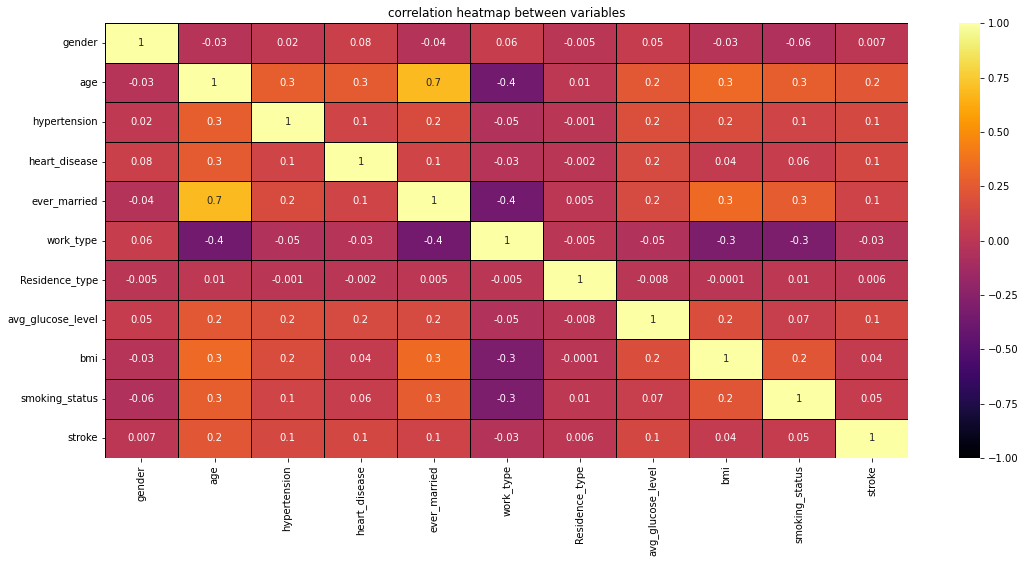

In [23]:
fig = (18,8)
plt.figure(figsize=fig)
heatmap = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('correlation heatmap between variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import pickle

In [25]:
columns = list(df.columns)
columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [26]:
x_col = columns[0:len(columns)-1]
y_col = columns[len(columns)-1]
y_col, x_col

('stroke',
 ['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status'])

In [27]:
x = df[x_col]
y = df[y_col]

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df[x_col], df[y_col])

In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)

In [118]:
# models
models = []

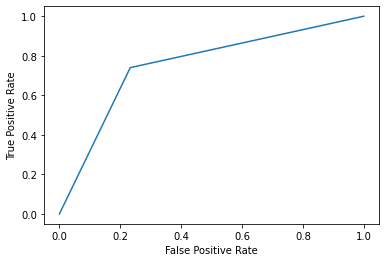

0.7537234042553191

In [119]:
# gaussiannb
pipe = Pipeline([('scaler',StandardScaler()),('gnb',GaussianNB())])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
gnb_score = accuracy_score(ytest,ypred)

location = 'models/gnb.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"gnb",
        "accuracy":gnb_score,
        "location":location
    }
)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,  ypred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

gnb_score

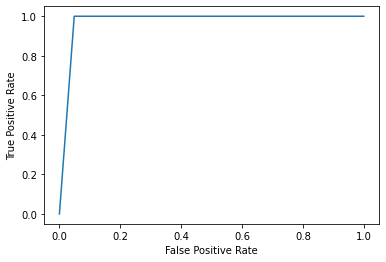

0.975531914893617

In [120]:
# decisiontree
pipe = Pipeline([('dt',DecisionTreeClassifier())])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
dt_score = accuracy_score(ytest,ypred)

location = 'models/dt.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"decision tree",
        "accuracy":dt_score,
        "location":location
    }
)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,  ypred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

dt_score

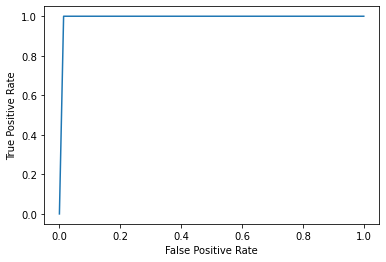

0.9930851063829788

In [121]:
# random forest
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('scaler',StandardScaler()),('rfc',RandomForestClassifier(random_state=0,))])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
rfc_score = accuracy_score(ytest,ypred)

location = 'models/rfc.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"random forest classifier",
        "accuracy":rfc_score,
        "location":location
    }
)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,  ypred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

rfc_score

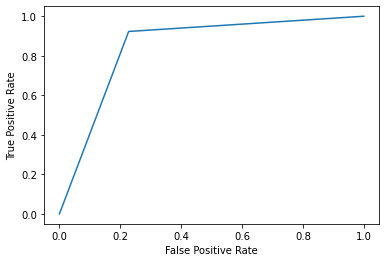

0.8473404255319149

In [122]:
# svm
pipe = Pipeline([('scaler',StandardScaler()),('svm',svm.SVC(kernel='rbf'))])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
svm_score = accuracy_score(ytest,ypred)

location = 'models/svm.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"svm",
        "accuracy":svm_score,
        "location":location
    }
)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,  ypred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

svm_score

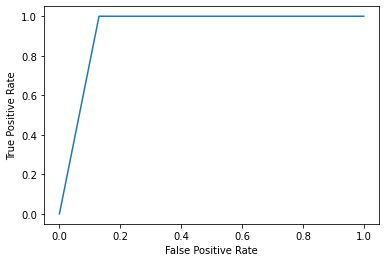

0.9345744680851064

In [123]:
# knn
pipe = Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=5))])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
knn_score = accuracy_score(ytest,ypred)

location = 'models/knn.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"knn",
        "accuracy":knn_score,
        "location":location
    }
)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,  ypred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

knn_score

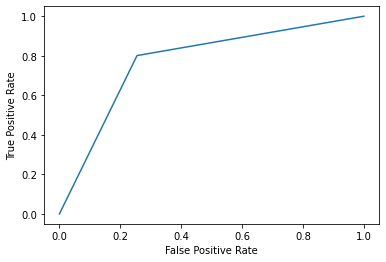

0.7728723404255319

In [124]:
# lr
pipe = Pipeline([('scaler',MinMaxScaler()),('lr',LogisticRegression(random_state=42))])
pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
lr_score = accuracy_score(ytest,ypred)

location = 'models/lr.pkl'
pickle.dump(pipe, open(location,'wb'))
models.append(
    {
        "model":"logistic regression",
        "accuracy":lr_score,
        "location":location
    }
)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,  ypred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

lr_score

In [125]:
import json

with open("results/models.json", "w") as outfile:
    json.dump(models, outfile)

In [37]:
import pandas as pd
import sqlite3

dataset = pd.read_csv('data/data.csv')

conn = sqlite3.connect('stroke_database.db')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS stroke (id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke)')
conn.commit()

dataset.to_sql('stroke', conn, if_exists='replace', index=False)

conn.close()

In [38]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [39]:
import sqlite3
conn = sqlite3.connect('stroke_database.db')
c = conn.cursor()

c.execute('''SELECT * FROM stroke''')
print(c.fetchall())

[(9046, 'Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked', 1), (51676, 'Female', 61.0, 0, 0, 'Yes', 'Self-employed', 'Rural', 202.21, None, 'never smoked', 1), (31112, 'Male', 80.0, 0, 1, 'Yes', 'Private', 'Rural', 105.92, 32.5, 'never smoked', 1), (60182, 'Female', 49.0, 0, 0, 'Yes', 'Private', 'Urban', 171.23, 34.4, 'smokes', 1), (1665, 'Female', 79.0, 1, 0, 'Yes', 'Self-employed', 'Rural', 174.12, 24.0, 'never smoked', 1), (56669, 'Male', 81.0, 0, 0, 'Yes', 'Private', 'Urban', 186.21, 29.0, 'formerly smoked', 1), (53882, 'Male', 74.0, 1, 1, 'Yes', 'Private', 'Rural', 70.09, 27.4, 'never smoked', 1), (10434, 'Female', 69.0, 0, 0, 'No', 'Private', 'Urban', 94.39, 22.8, 'never smoked', 1), (27419, 'Female', 59.0, 0, 0, 'Yes', 'Private', 'Rural', 76.15, None, 'Unknown', 1), (60491, 'Female', 78.0, 0, 0, 'Yes', 'Private', 'Urban', 58.57, 24.2, 'Unknown', 1), (12109, 'Female', 81.0, 1, 0, 'Yes', 'Private', 'Rural', 80.43, 29.7, 'never smoked', 1), (12095, 'Fem